# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv("crop_production_bangladesh.csv")
df.head(5)

District    Division  Year Crop Type  Area(acres)  Production(tons)
0      Khulna      Khulna  2006  Aus Rice      10750.0            5557.0
1      Jessor      Khulna  2006  Aus Rice      72520.0           75625.0
2    Satkhira      Khulna  2006  Aus Rice       3720.0            3606.0
3   Chuadanga      Khulna  2006  Aus Rice      20660.0           15796.0
4  Chittagong  Chittagong  2006  Aus Rice      91835.0           86859.0

# Checking Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          465 non-null    object 
 1   Division          465 non-null    object 
 2   Year              465 non-null    int64  
 3   Crop Type         465 non-null    object 
 4   Area(acres)       464 non-null    float64
 5   Production(tons)  464 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 21.9+ KB


In [4]:
df.mean()

Year                  2009.645161
Area(acres)         193036.881466
Production(tons)    219323.247845
dtype: float64

# Checking For Null Value

In [5]:
df.isnull().sum()

District            0
Division            0
Year                0
Crop Type           0
Area(acres)         1
Production(tons)    1
dtype: int64

# Dropping Null Values

In [6]:
df.dropna(inplace = True)
df.isnull().sum()

District            0
Division            0
Year                0
Crop Type           0
Area(acres)         0
Production(tons)    0
dtype: int64

# Unique Datas in Columns

In [7]:
for i in df.columns:
    print("Column name: ", i)
    print("Number of Unique Data: ", len(df[i].unique()))
    print(df[i].unique())

Column name:  District
Number of Unique Data:  18
['Khulna' 'Jessor' 'Satkhira' 'Chuadanga' 'Chittagong' "Cox's Bazar"
 'Chandpur' 'Feni' 'Comilla' 'Rangamati' 'Noakhali' 'Khagrachhari'
 'Dinajpur' 'Rangpur' 'Rajshahi' 'Bogura' 'Kushtia' 'Bogra']
Column name:  Division
Number of Unique Data:  3
['Khulna' 'Chittagong' 'North region']
Column name:  Year
Number of Unique Data:  10
[2006 2007 2008 2009 2010 2011 2012 2013 2014 2005]
Column name:  Crop Type
Number of Unique Data:  3
['Aus Rice' 'Aman Rice' 'Boro Rice']
Column name:  Area(acres)
Number of Unique Data:  458
[1.075000e+04 7.252000e+04 3.720000e+03 2.066000e+04 9.183500e+04
 1.725000e+03 3.749000e+04 3.443500e+04 1.162250e+05 1.279000e+04
 8.215500e+04 6.585000e+03 1.926000e+04 0.000000e+00 7.692500e+04
 2.094000e+04 1.369500e+04 8.666000e+04 3.175000e+03 2.755500e+04
 9.960000e+04 1.765000e+03 2.345000e+04 3.276500e+04 7.737500e+04
 1.543500e+04 9.806000e+04 6.545000e+03 2.514500e+04 1.055200e+05
 5.255500e+04 1.898000e+04 9.9

# Calculating Production Percentage

In [8]:
total_production = df["Production(tons)"].sum()
df["Production Percentage"] = df["Production(tons)"].map(lambda x:(x/total_production)*100)
df[:5]

District    Division  Year Crop Type  Area(acres)  Production(tons)  \
0      Khulna      Khulna  2006  Aus Rice      10750.0            5557.0   
1      Jessor      Khulna  2006  Aus Rice      72520.0           75625.0   
2    Satkhira      Khulna  2006  Aus Rice       3720.0            3606.0   
3   Chuadanga      Khulna  2006  Aus Rice      20660.0           15796.0   
4  Chittagong  Chittagong  2006  Aus Rice      91835.0           86859.0   

   Production Percentage  
0               0.005461  
1               0.074313  
2               0.003543  
3               0.015522  
4               0.085352

# LinePlot for Year & Production

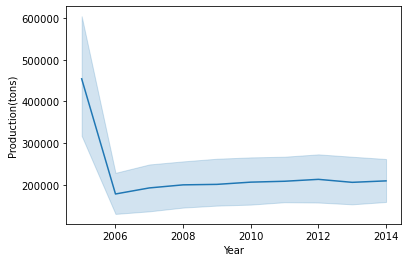

In [9]:
sns.lineplot(x=df["Year"], y=df["Production(tons)"]);

# Bar Plot for District & Production

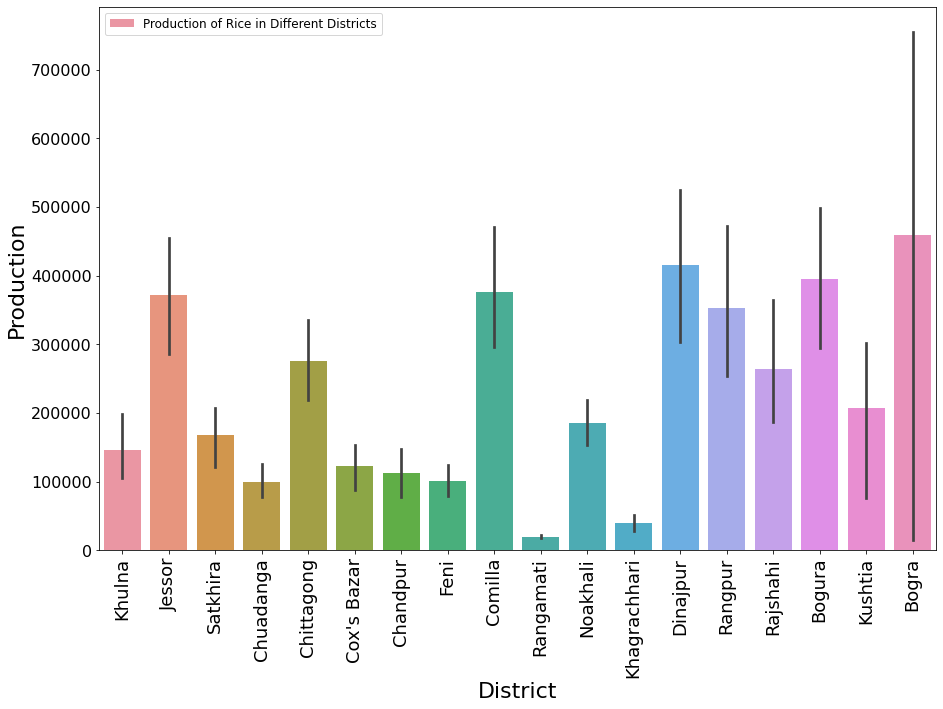

In [10]:
plt.figure(figsize = (15,10))
sns.barplot(x=df["District"], y=df["Production(tons)"], label = "Production of Rice in Different Districts")
plt.xlabel("District", fontsize=22)
plt.ylabel("Production", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.legend(prop={'size': 12});
plt.yticks(fontsize=16);

# Join Plot Area & Production

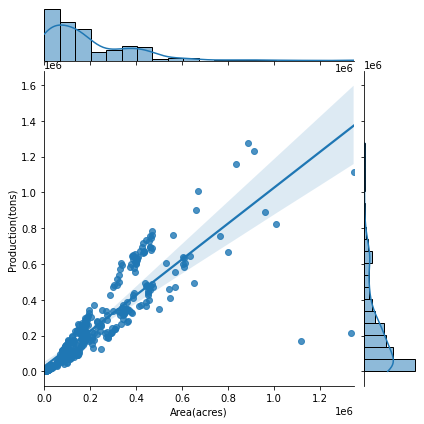

In [11]:
sns.jointplot(x=df["Area(acres)"], y=df["Production(tons)"],kind='reg');

# Checking Crop Info

In [12]:
df["Crop Type"].value_counts()

Aman Rice    155
Boro Rice    155
Aus Rice     154
Name: Crop Type, dtype: int64

# Getting Information for Boro Rice

In [13]:
boro_rice = df[df["Crop Type"] == "Boro Rice"]
boro_rice[:5]

District    Division  Year  Crop Type  Area(acres)  Production(tons)  \
288      Khulna      Khulna  2006  Boro Rice      85440.0          113713.0   
289      Jessor      Khulna  2006  Boro Rice     339140.0          591955.0   
290    Satkhira      Khulna  2006  Boro Rice     140060.0          216233.0   
291   Chuadanga      Khulna  2006  Boro Rice      77735.0          116240.0   
292  Chittagong  Chittagong  2006  Boro Rice     173745.0          188662.0   

     Production Percentage  
288               0.111740  
289               0.581683  
290               0.212481  
291               0.114223  
292               0.185388

# Production rate for Boro rice per Division

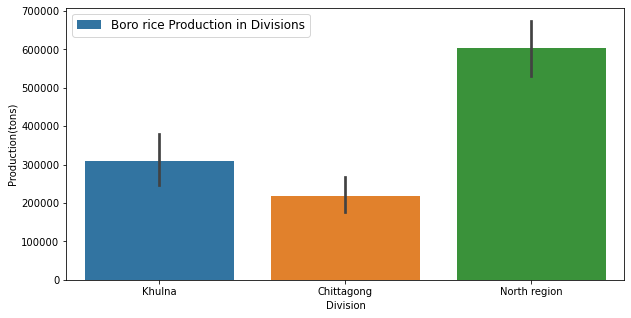

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x="Division", y="Production(tons)", data = boro_rice, label="Boro rice Production in Divisions")
plt.legend(prop={'size': 12});

# Production rate for Boro rice per District

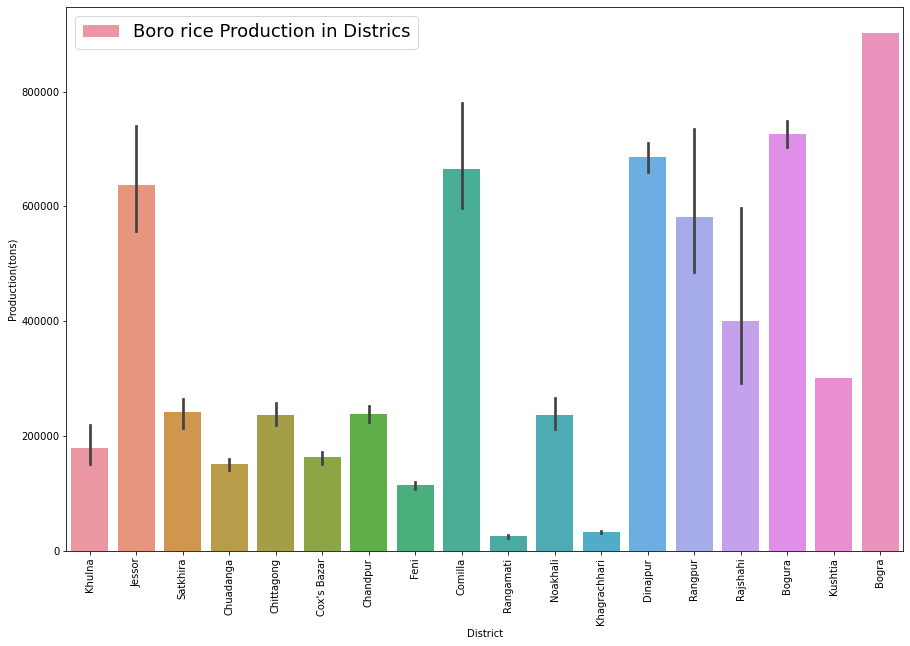

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x="District", y="Production(tons)",data=boro_rice, label="Boro rice Production in Districs")
plt.xticks(rotation=90)
plt.legend(prop={'size': 18})
plt.show();

# Calculating Boro Production in Descending order

In [16]:
most_boro_rice_producing_district = boro_rice.groupby("District")["Production(tons)"].sum().reset_index().sort_values(
    by='Production(tons)',ascending=False)
sum_max = most_boro_rice_producing_district["Production(tons)"].sum()
most_boro_rice_producing_district["Production Percentage"] = most_boro_rice_producing_district["Production(tons)"].map(lambda x:(x/sum_max)*100)
most_boro_rice_producing_district[:5]

District  Production(tons)  Production Percentage
7   Dinajpur         6853043.0              13.011016
5    Comilla         6647654.0              12.621070
1     Bogura         6532081.0              12.401646
9     Jessor         6376994.0              12.107201
16   Rangpur         5822931.0              11.055271

# Bar Plot of Boro Rice

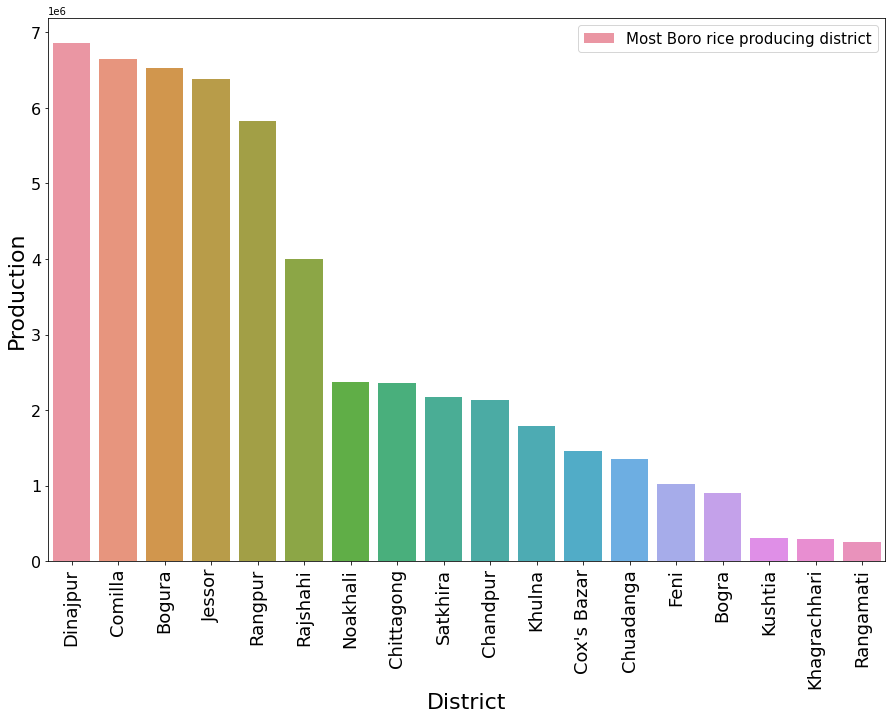

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(x="District", y="Production(tons)",data=most_boro_rice_producing_district, label="Most Boro rice producing district")
plt.legend(prop={'size': 15})
plt.xlabel("District", fontsize=22)
plt.ylabel("Production", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=16)
plt.show();

# Production rate for Boro rice per Year

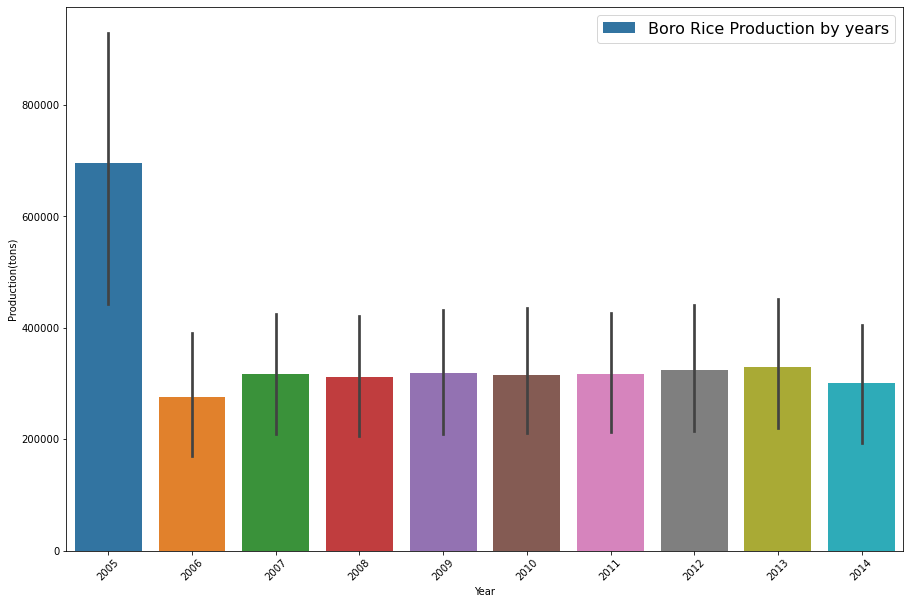

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x="Year", y="Production(tons)",data=boro_rice, label="Boro Rice Production by years")
plt.xticks(rotation=45)
plt.legend(prop={'size':16})
plt.show();

# Join Plot for Boro Rice

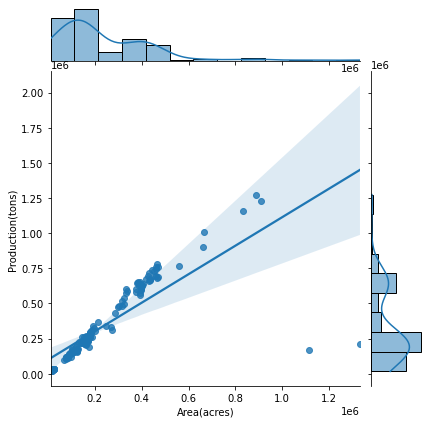

In [19]:
sns.jointplot(x="Area(acres)", y="Production(tons)", data=boro_rice, kind="reg");

In [20]:
aman_rice = df[df["Crop Type"] == "Aman Rice"]
aman_rice[:5]

District    Division  Year  Crop Type  Area(acres)  Production(tons)  \
144      Khulna      Khulna  2006  Aman Rice     274505.0          220009.0   
145      Jessor      Khulna  2006  Aman Rice     330570.0          332764.0   
146    Satkhira      Khulna  2006  Aman Rice     245990.0          257794.0   
147   Chuadanga      Khulna  2006  Aman Rice      89290.0           76724.0   
148  Chittagong  Chittagong  2006  Aman Rice     459145.0          456501.0   

     Production Percentage  
144               0.216191  
145               0.326989  
146               0.253320  
147               0.075393  
148               0.448579

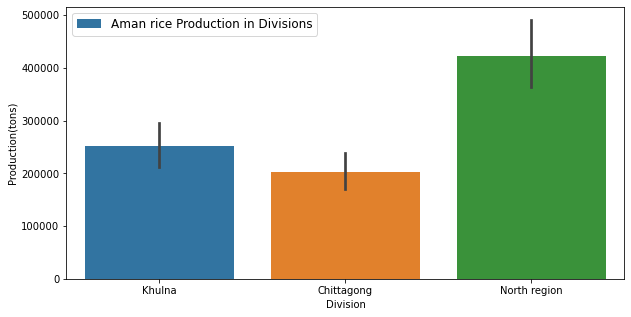

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x="Division", y="Production(tons)", data = aman_rice, label="Aman rice Production in Divisions")
plt.legend(prop={'size': 12});

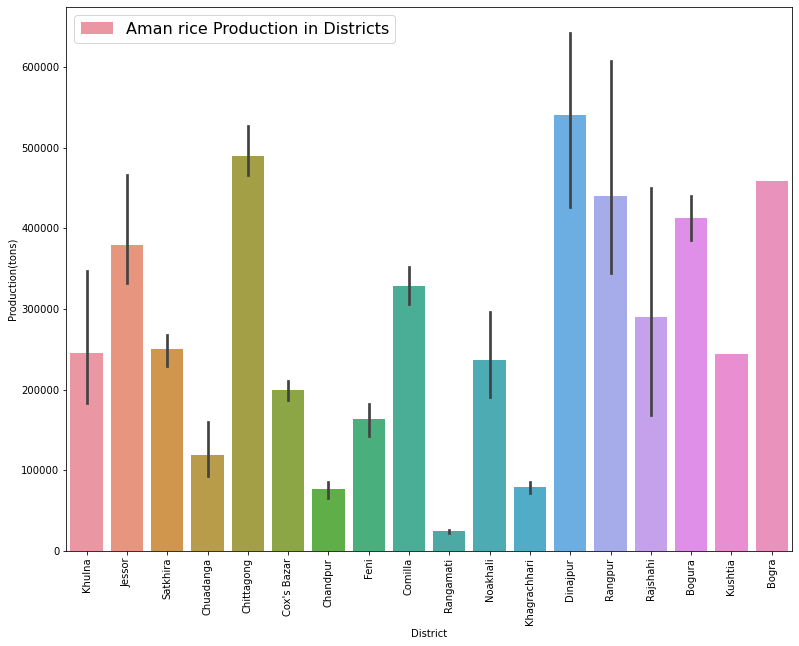

In [22]:
plt.figure(figsize=(13,10))
sns.barplot(x="District", y="Production(tons)",data=aman_rice, label="Aman rice Production in Districts")
plt.xticks(rotation=90)
plt.legend(prop={'size': 16})
plt.show();

In [23]:
most_aman_rice_producing_district = aman_rice.groupby("District")["Production(tons)"].sum().reset_index().sort_values(
    by='Production(tons)',ascending=False)
sum_max = most_aman_rice_producing_district["Production(tons)"].sum()
most_aman_rice_producing_district["Production Percentage"] = most_aman_rice_producing_district["Production(tons)"].map(lambda x:(x/sum_max)*100)
most_aman_rice_producing_district[:5]

District  Production(tons)  Production Percentage
7     Dinajpur         5412765.0              12.836937
3   Chittagong         4892807.0              11.603803
16     Rangpur         4405738.0              10.448668
9       Jessor         3797721.0               9.006692
1       Bogura         3713794.0               8.807650

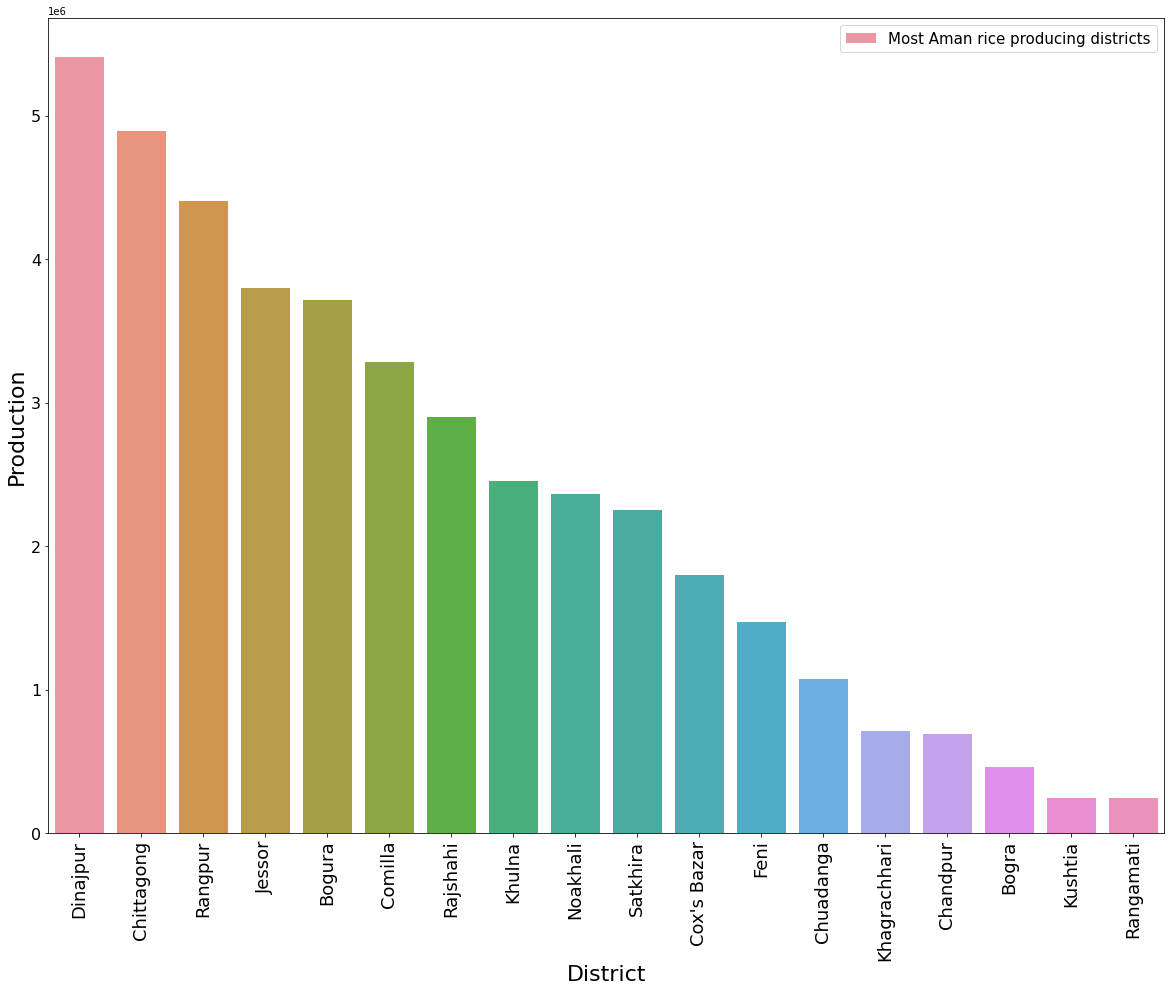

In [24]:
plt.figure(figsize=(20,15))
sns.barplot(x="District", y="Production(tons)",data=most_aman_rice_producing_district, label="Most Aman rice producing districts")
plt.legend(prop={'size': 15})
plt.xlabel("District", fontsize=22)
plt.ylabel("Production", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=16)
plt.show();

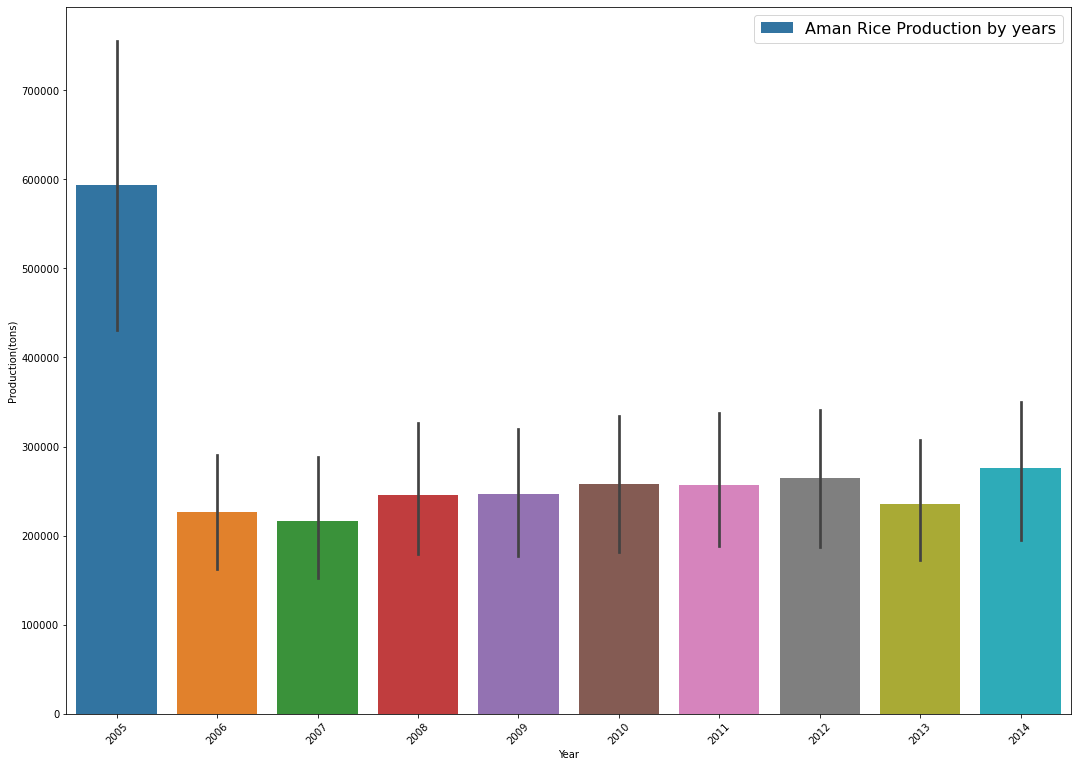

In [25]:
plt.figure(figsize=(18,13))
sns.barplot(x="Year", y="Production(tons)",data=aman_rice, label="Aman Rice Production by years")
plt.xticks(rotation=45)
plt.legend(prop={'size':16})
plt.show();

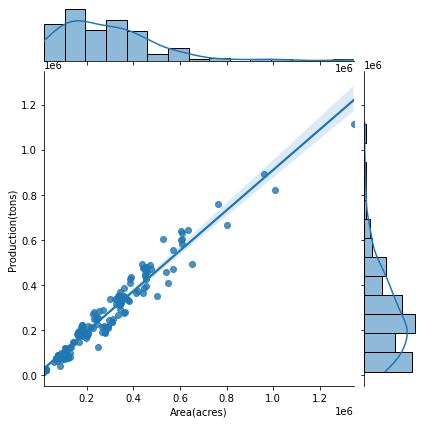

In [26]:
sns.jointplot(x="Area(acres)", y="Production(tons)", data=aman_rice, kind="reg");

In [27]:
aus_rice = df[df["Crop Type"] == "Aus Rice"]
aus_rice[:5]

District    Division  Year Crop Type  Area(acres)  Production(tons)  \
0      Khulna      Khulna  2006  Aus Rice      10750.0            5557.0   
1      Jessor      Khulna  2006  Aus Rice      72520.0           75625.0   
2    Satkhira      Khulna  2006  Aus Rice       3720.0            3606.0   
3   Chuadanga      Khulna  2006  Aus Rice      20660.0           15796.0   
4  Chittagong  Chittagong  2006  Aus Rice      91835.0           86859.0   

   Production Percentage  
0               0.005461  
1               0.074313  
2               0.003543  
3               0.015522  
4               0.085352

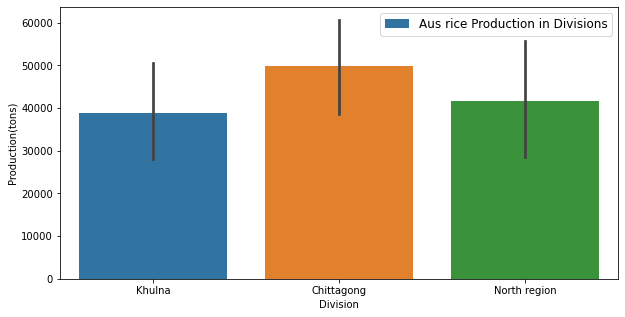

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x="Division", y="Production(tons)", data = aus_rice, label="Aus rice Production in Divisions")
plt.legend(prop={'size': 12});

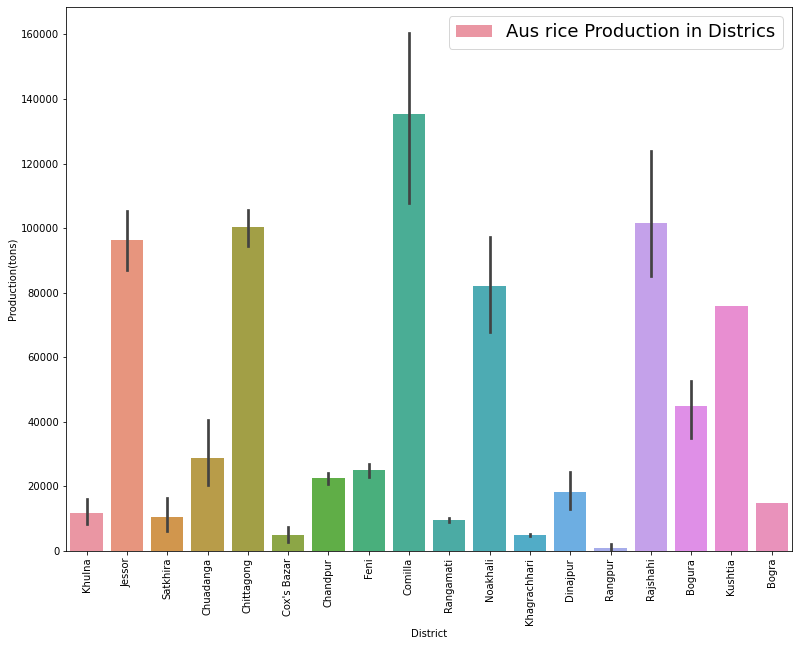

In [29]:
plt.figure(figsize=(13,10))
sns.barplot(x="District", y="Production(tons)",data=aus_rice, label="Aus rice Production in Districs")
plt.xticks(rotation=90)
plt.legend(prop={'size': 18})
plt.show();

In [30]:
most_aus_rice_producing_district = aus_rice.groupby("District")["Production(tons)"].sum().reset_index().sort_values(
    by='Production(tons)',ascending=False)
sum_max = most_aus_rice_producing_district["Production(tons)"].sum()
most_aus_rice_producing_district["Production Percentage"] = most_aus_rice_producing_district["Production(tons)"].map(lambda x:(x/sum_max)*100)
most_aus_rice_producing_district[:5]

District  Production(tons)  Production Percentage
5      Comilla         1353361.0              19.530834
14    Rajshahi         1014907.0              14.646484
3   Chittagong         1004411.0              14.495012
9       Jessor          963546.0              13.905275
13    Noakhali          820015.0              11.833928

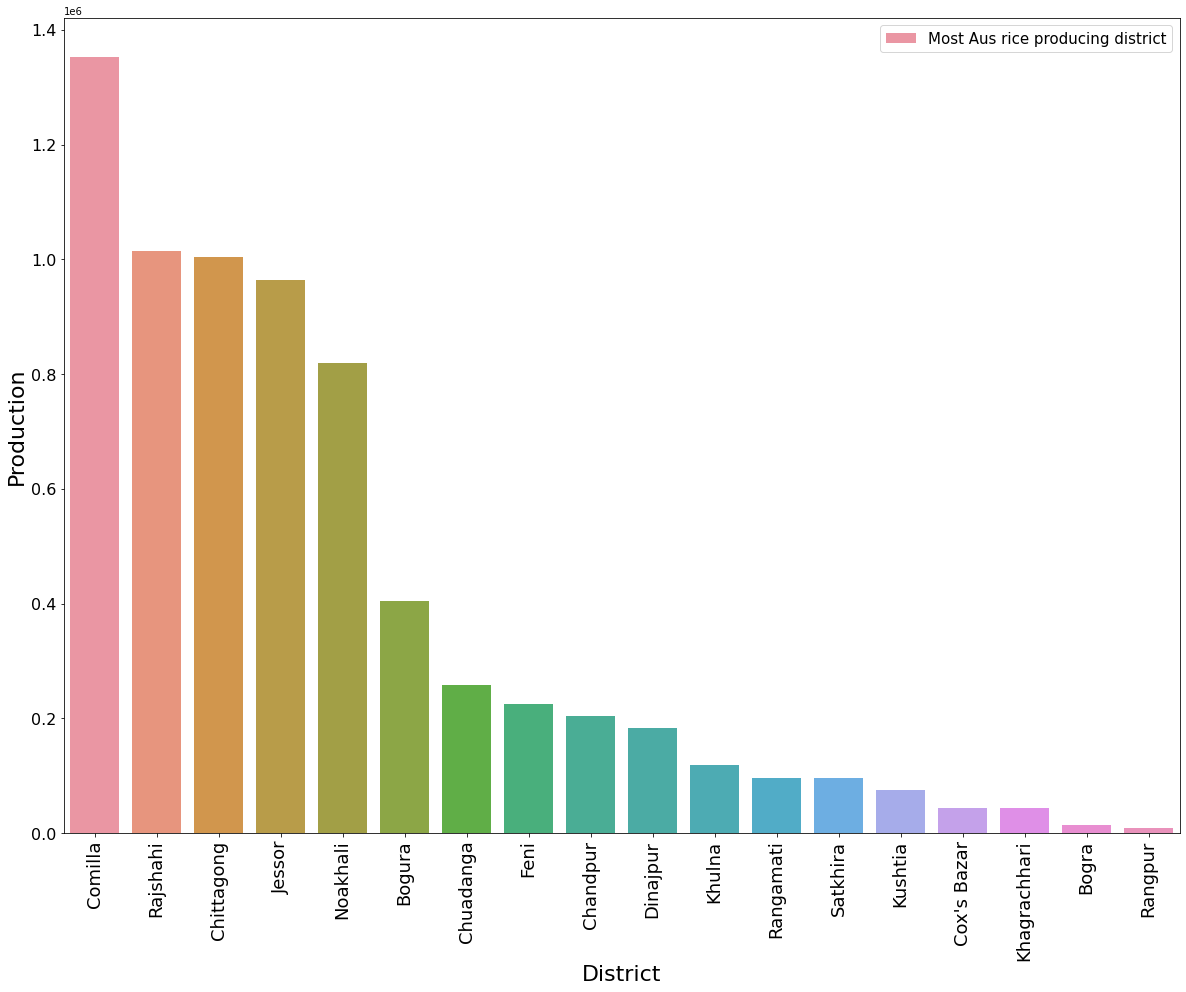

In [31]:
plt.figure(figsize=(20,15))
sns.barplot(x="District", y="Production(tons)",data=most_aus_rice_producing_district, label="Most Aus rice producing district")
plt.legend(prop={'size': 15})
plt.xlabel("District", fontsize=22)
plt.ylabel("Production", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=16)
plt.show();

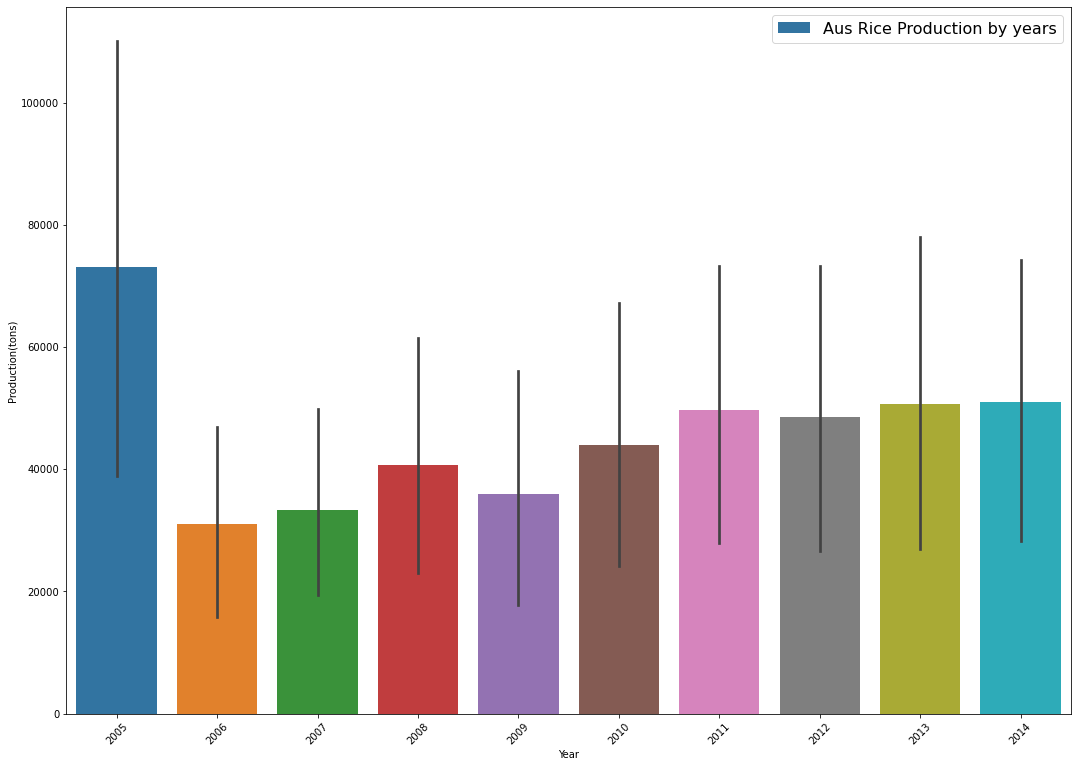

In [32]:
plt.figure(figsize=(18,13))
sns.barplot(x="Year", y="Production(tons)",data=aus_rice, label="Aus Rice Production by years")
plt.xticks(rotation=45)
plt.legend(prop={'size':16})
plt.show();

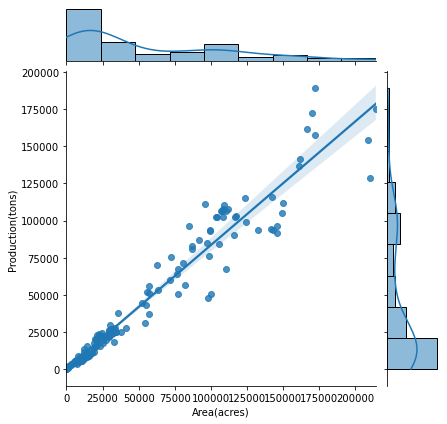

In [33]:
sns.jointplot(x="Area(acres)", y="Production(tons)", data=aus_rice, kind="reg");

# Creating Dummy DataFrame

In [34]:
dfOne = df.drop("Year", axis=1) # Dropping Year Column
dummy_df = pd.get_dummies(dfOne)
dummy_df[:5]

Area(acres)  Production(tons)  Production Percentage  District_Bogra  \
0      10750.0            5557.0               0.005461               0   
1      72520.0           75625.0               0.074313               0   
2       3720.0            3606.0               0.003543               0   
3      20660.0           15796.0               0.015522               0   
4      91835.0           86859.0               0.085352               0   

   District_Bogura  District_Chandpur  District_Chittagong  \
0                0                  0                    0   
1                0                  0                    0   
2                0                  0                    0   
3                0                  0                    0   
4                0                  0                    1   

   District_Chuadanga  District_Comilla  District_Cox's Bazar  ...  \
0                   0                 0                     0  ...   
1                   0                 0                     0  ...   
2                   0                 0                     0  ...   
3                   1                 0                     0  ...   
4                   0                 0                     0  ...   

   District_Rajshahi  District_Rangamati  District_Rangpur  District_Satkhira  \
0                  0                   0                 0                  0   
1                  0                   0                 0                  0   
2                  0                   0                 0                  1   
3                  0                   0                 0                  0   
4                  0                   0                 0                  0   

   Division_Chittagong  Division_Khulna  Division_North region  \
0                    0                1                      0   
1                    0                1                      0   
2                    0                1                      0   
3                    0                1                      0   
4                    1                0                      0   

   Crop Type_Aman Rice  Crop Type_Aus Rice  Crop Type_Boro Rice  
0                    0                   1                    0  
1                    0                   1                    0  
2                    0                   1                    0  
3                    0                   1                    0  
4                    0                   1                    0  

[5 rows x 27 columns]

# Importing Libraries

In [35]:
#Importing Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#Importing metrics to calculate error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

#Importing to train and test data
from sklearn.model_selection import train_test_split

import time

# Creating train & test data

In [36]:
X = dummy_df.drop("Production(tons)", axis=1)
y = dummy_df["Production(tons)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# R2 Score for Random Forest Regressor

In [37]:
from sklearn.metrics import r2_score
rfr_score_list = []
rfr_exec_time_list = []
for i in range(100):
    est = 100
    rfr = RandomForestRegressor(n_estimators=est)
    rfr.fit(X_train,y_train)
    start_time = time.time()
    rfr_pred = rfr.predict(X_test)
    end_time = time.time()
    rfr_exec_time_list.append(end_time - start_time)
    rfr_score_list.append(r2_score(y_test, rfr_pred))
    est = est + 10
rfr_exec_time_list = np.array(rfr_exec_time_list)
rfr_score_list = np.array(rfr_score_list)
r2_score = np.mean(rfr_score_list)
print("R2 score of RandomeForestRegressor: ", r2_score);

R2 score of RandomeForestRegressor:  0.9992915221609531


## Creating DataFrame for R2_Score and Execution time

In [38]:
r2_score_df = pd.DataFrame(rfr_score_list, columns=["RandomForestRegressor"])
exec_time_df = pd.DataFrame(rfr_exec_time_list, columns=["RandomForestRegressor"])

In [39]:
exec_time_df[:5]

RandomForestRegressor
0               0.008976
1               0.008976
2               0.007978
3               0.007979
4               0.007979

In [40]:
r2_score_df[:5]

RandomForestRegressor
0               0.999475
1               0.999659
2               0.999280
3               0.999207
4               0.999499

# R2 Score for Linear Regression

In [41]:
from sklearn.metrics import r2_score
lr_score_list = []
lr_exec_time_list = []
for i in range(100):
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    start_time = time.time()
    lr_pred = lr.predict(X_test)
    end_time = time.time()
    lr_exec_time_list.append(end_time - start_time)
    lr_score_list.append(r2_score(y_test, lr_pred))
lr_exec_time_list = np.array(lr_exec_time_list)
lr_score_list = np.array(lr_score_list)
r2_score = np.mean(lr_score_list)
print("R2 score of Linear Regression: ", r2_score);

R2 score of Linear Regression:  1.0


## Creating DataFrame for R2_Score and Execution time

In [42]:
r2_score_df["LinearRegression"] = lr_score_list
exec_time_df["LinearRegression"] = lr_exec_time_list

In [43]:
exec_time_df[:5]

RandomForestRegressor  LinearRegression
0               0.008976          0.001996
1               0.008976          0.000997
2               0.007978          0.000998
3               0.007979          0.000998
4               0.007979          0.001994

In [44]:
r2_score_df[:5]

RandomForestRegressor  LinearRegression
0               0.999475               1.0
1               0.999659               1.0
2               0.999280               1.0
3               0.999207               1.0
4               0.999499               1.0

# R2 Score for AdaBoost Regressor

In [45]:
from sklearn.metrics import r2_score
abr_score_list = []
abr_exec_time_list = []
for i in range(100):
    est = 100
    abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),
    n_estimators=est)
    abr.fit(X_train,y_train)
    start_time = time.time()
    abr_pred = abr.predict(X_test)
    end_time = time.time()
    abr_exec_time_list.append(end_time - start_time)
    abr_score_list.append(r2_score(y_test, abr_pred))
    est = est + 10
abr_exec_time_list = np.array(abr_exec_time_list)
abr_score_list = np.array(abr_score_list)
r2_score = np.mean(abr_score_list)
print("R2 score of AdaBoost Regressor: ", r2_score);

R2 score of AdaBoost Regressor:  0.7456228446093267


## Creating DataFrame for R2_Score and Execution time

In [46]:
r2_score_df["AdaBoostRegressor"] = abr_score_list
exec_time_df["AdaBoostRegressor"] = abr_exec_time_list

In [47]:
r2_score_df[:5]

RandomForestRegressor  LinearRegression  AdaBoostRegressor
0               0.999475               1.0           0.778058
1               0.999659               1.0           0.756355
2               0.999280               1.0           0.726831
3               0.999207               1.0           0.746011
4               0.999499               1.0           0.758196

In [48]:
exec_time_df[:5]

RandomForestRegressor  LinearRegression  AdaBoostRegressor
0               0.008976          0.001996           0.003988
1               0.008976          0.000997           0.001994
2               0.007978          0.000998           0.001995
3               0.007979          0.000998           0.001995
4               0.007979          0.001994           0.001971

# Showing Accuracy score variance

## Accuracy score for Random Forest Regressor

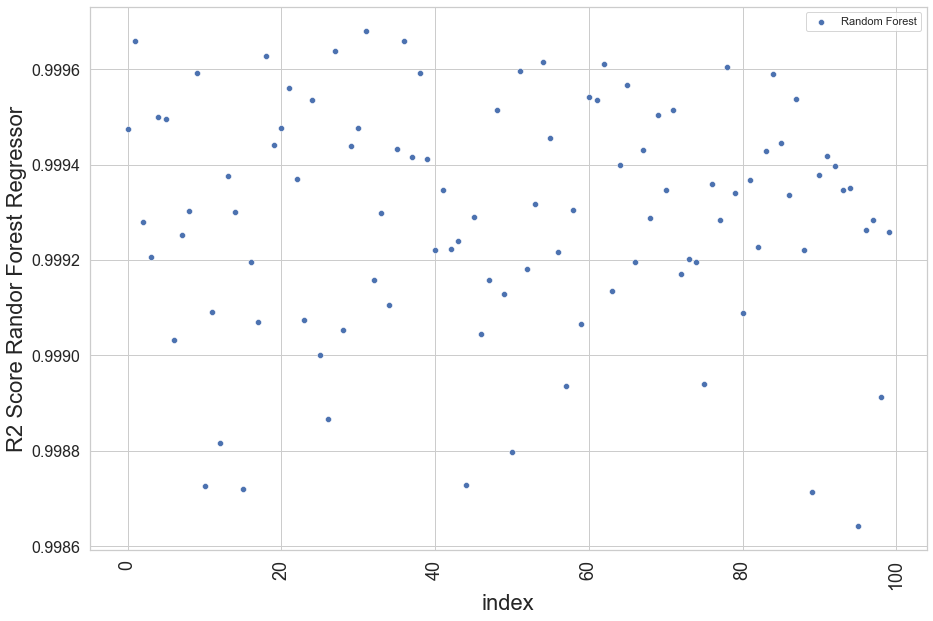

In [49]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")
sns.scatterplot(x=r2_score_df.index, y=r2_score_df["RandomForestRegressor"], label = "Random Forest")
plt.xlabel("index", fontsize=22)
plt.ylabel("R2 Score Randor Forest Regressor", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=16);

## Accuracy score for Linear Regression

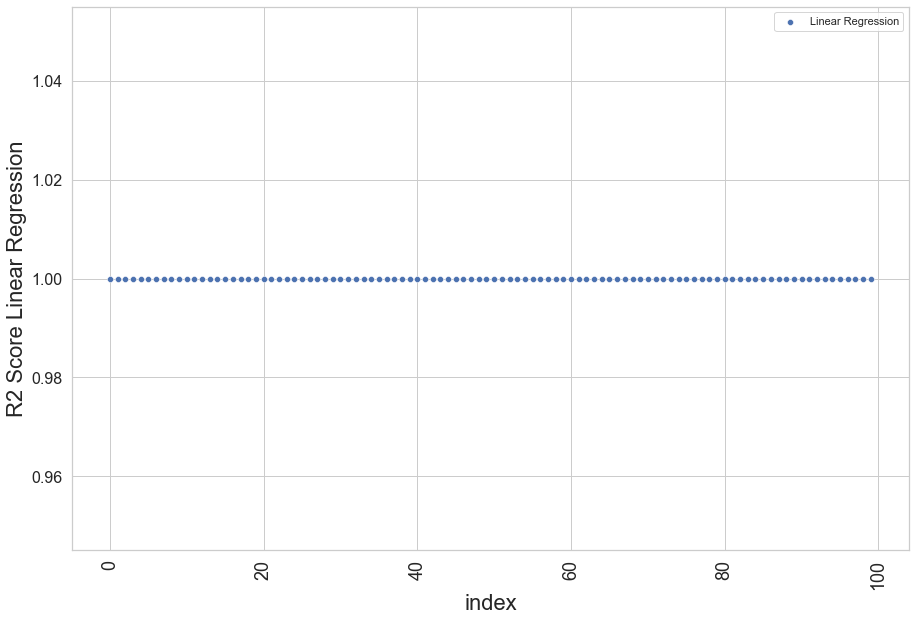

In [50]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")
sns.scatterplot(x=r2_score_df.index, y=r2_score_df["LinearRegression"], label = "Linear Regression")
plt.xlabel("index", fontsize=22)
plt.ylabel("R2 Score Linear Regression", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=16);

## Accuracy score for AdaBoost Regressor

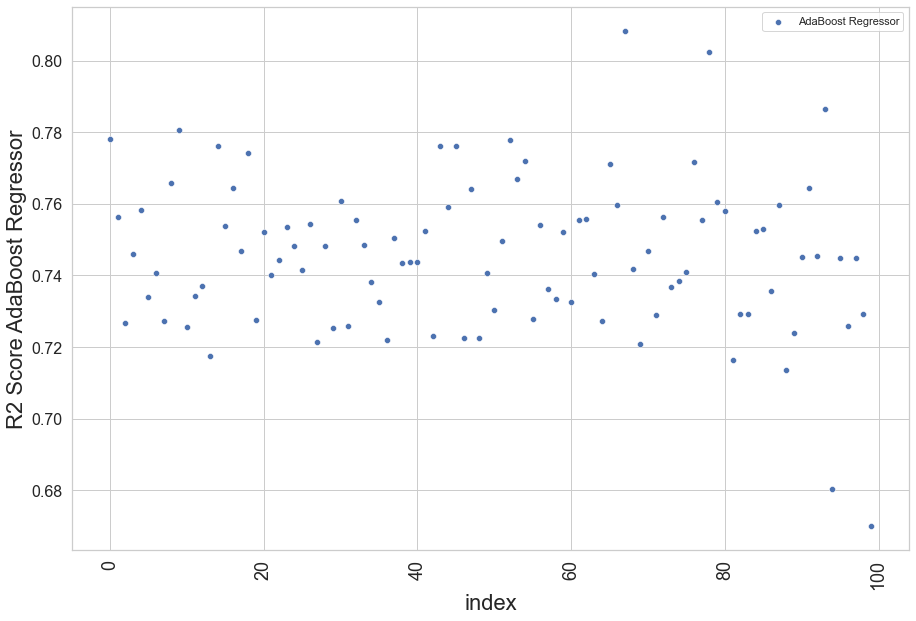

In [51]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")
sns.scatterplot(x=r2_score_df.index, y=r2_score_df["AdaBoostRegressor"], label = "AdaBoost Regressor")
plt.xlabel("index", fontsize=22)
plt.ylabel("R2 Score AdaBoost Regressor", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=16);

# Showing Execution time variance 

## Execution time for Random Forest Regressor

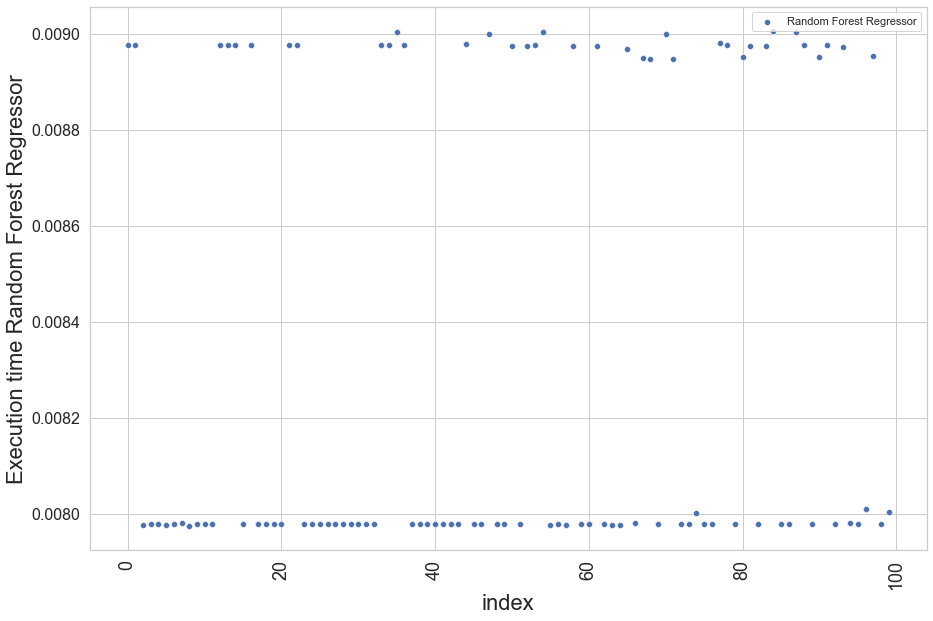

In [52]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")
sns.scatterplot(x=exec_time_df.index, y=exec_time_df["RandomForestRegressor"], label = "Random Forest Regressor")
plt.xlabel("index", fontsize=22)
plt.ylabel("Execution time Random Forest Regressor", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=16);

## Execution time for Linear Regression

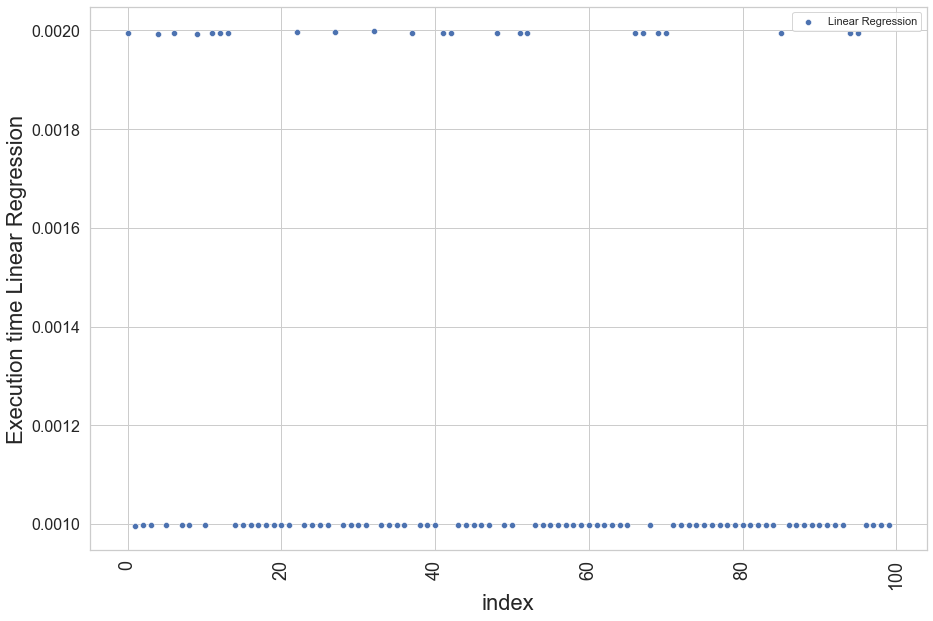

In [53]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")
sns.scatterplot(x=exec_time_df.index, y=exec_time_df["LinearRegression"], label = "Linear Regression")
plt.xlabel("index", fontsize=22)
plt.ylabel("Execution time Linear Regression", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=16);

## Execution time for AdaBoost Regressor

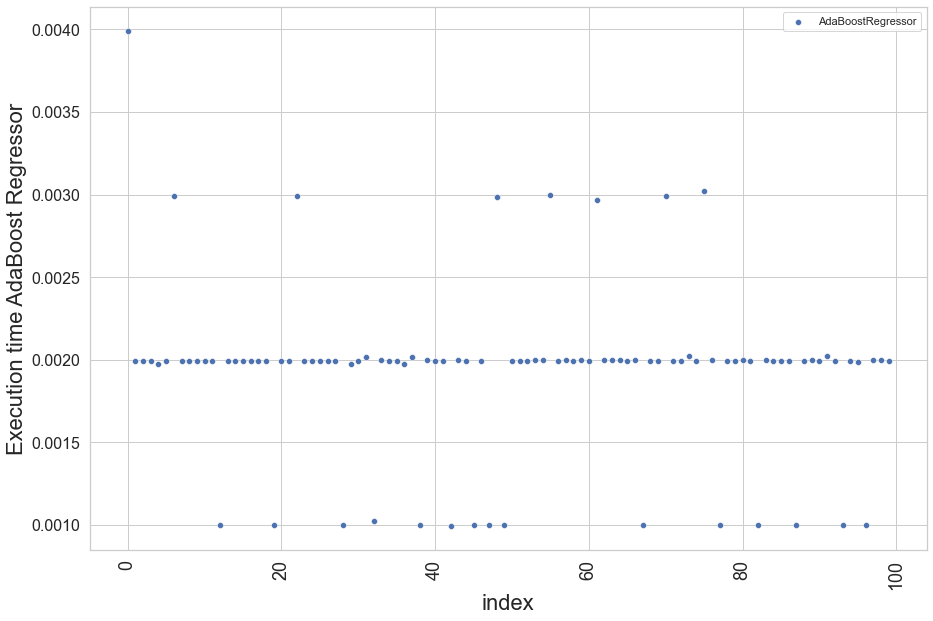

In [54]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")
sns.scatterplot(x=exec_time_df.index, y=exec_time_df["AdaBoostRegressor"], label = "AdaBoostRegressor")
plt.xlabel("index", fontsize=22)
plt.ylabel("Execution time AdaBoost Regressor", fontsize=22)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=16);

# Calculating average execution time

## Average Execution time for Random Forest Regressor

In [55]:
average_exec_time_for_rfr = exec_time_df["RandomForestRegressor"].mean() * 1000
average_exec_time_for_rfr

8.348445892333984

## Average Execution time for Linear Regression

In [56]:
average_exec_time_for_lr = exec_time_df["LinearRegression"].mean() * 1000
average_exec_time_for_lr

1.226809024810791

## Average Execution time for AdaBoost Regressor

In [57]:
average_exec_time_for_abr = exec_time_df["AdaBoostRegressor"].mean() * 1000
average_exec_time_for_abr

1.9354963302612305

# Comparing Execution time for each Regressor

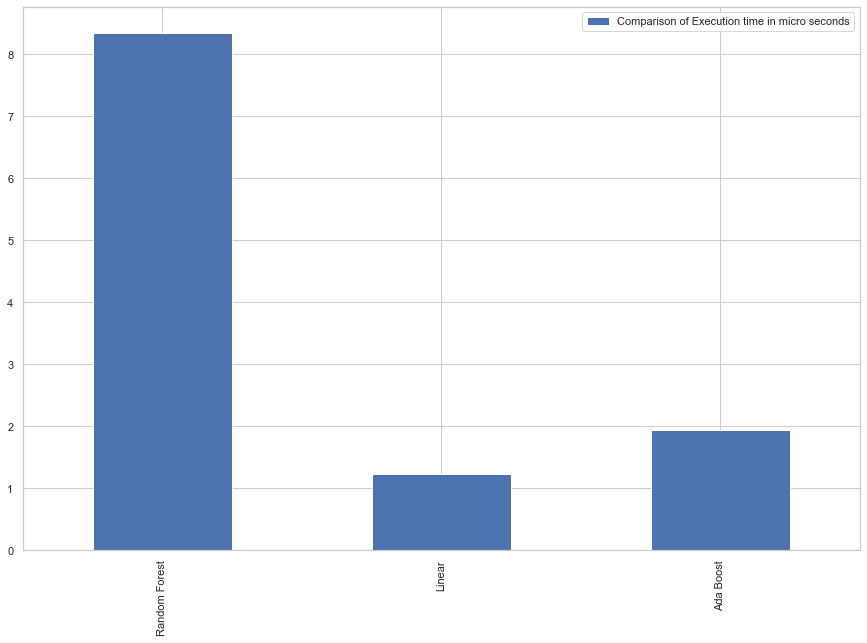

In [58]:
comp_exec_time = {
    "Random Forest" : average_exec_time_for_rfr,
    "Linear" : average_exec_time_for_lr,
    "Ada Boost" : average_exec_time_for_abr
}
exec_df = pd.DataFrame(comp_exec_time.values(),
                          comp_exec_time.keys(),
                          columns=["Comparison of Execution time in micro seconds"])
exec_df.plot.bar(figsize=(15,10));